# Домашнее задание "Случайные величины и вероятности".

## Уровень 0:


### Задание 1

В магазин привезли устройства с 3-х разных предприятий. 

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта. 

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

In [1]:
A = 0.2 # Доля продукции первого предприятия
B = 0.3 # Доля продукции второго предприятия
C = 0.5 # Доля продукции третьего предприятия

Ax = 0.1 # Доля высшего сорта в продукции первого предприятия,
Bx = 0.05 # Доля высшего сорта в продукции второго предприятия
Cx = 0.2 # Доля высшего сорта в продукции третьего предприятия

# Тогда вероятность того, что случайно купленная новая продукция окажется высшего сорта:
P = A*Ax + B*Bx + C*Cx
P

0.135

### Задание 2


Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

In [2]:
N = 2**3 # Количество возможных исходов

# Каждое из событий наступает в 4 из возможных исходов, значит их вероятности будут равны
PA1 = 4/N # Вероятность наступления события A1
PA2 = 4/N # Вероятность наступления события A2
PA3 = 4/N # Вероятность наступления события A3

# При наступлении одного из событий (A1, A2, A3), любое другое возникает в 2 из 4 возможных исходов, значит их вероятности будут
PA1_A2 = 2/4 # Вероятность наступления события A2 при условии наступления события A1
PA1_A3 = 2/4 # Вероятность наступления события A3 при условии наступления события A1
PA2_A3 = 2/4 # Вероятность наступления события A3 при условии наступления события A2

In [3]:
# События называются независимыми если наступление одного из них не меняет вероятность наступления другого
# Мы видим, что все рассчитанные вероятности между собой равны, значит события (A1, A2, A3) являются попарно независимыми
PA1 == PA2 == PA3 == PA1_A2 == PA1_A3 == PA2_A3

True

In [4]:
# При этом события не являются независимыми в совокупности, так как при наступлении одновременно любых двух событий мы знаем,
# что третье тоже наступило. Соответственно мы имеем следующее неравенство
PA1_A2 * PA2_A3 ==  PA1 * PA2 * PA3

False

## Уровень 1:

### Задание 3


Изучите 3 распределения из библиотеки scipy: [Нормальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html), [Экспоненциальное](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html), [Стьюдента](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html). Используя функцию плотности распредления (`pdf`), постройте пять графиков плотностей для каждого распределения при разных параметрах. Запишите ваши наблюдения: как и на что влияют параметры у каждого распределения. 

Дополнительная информация [тут](https://mipt-stats.gitlab.io/courses/python/07_scipy_stats.html).

In [5]:
import numpy as np
from scipy.stats import norm
from scipy.stats import expon
from scipy.stats import t
import matplotlib.pyplot as plt

In [6]:
def charts(ticks, scale, loc, df):
    fig, axs = plt.subplots(1, 3, figsize=(17, 4))
    
    a = np.linspace(norm.ppf(0.01), norm.ppf(0.99), ticks)
    axs[0].plot(a, norm.pdf(a, scale=scale, loc=loc), c='b')
    axs[0].title.set_text('Нормальное распределение')

    b = np.linspace(expon.ppf(0.01), expon.ppf(0.99), ticks)
    axs[1].plot(b, expon.pdf(b, scale=scale, loc=loc), c='r')
    axs[1].title.set_text('Экспоненциальное распределение')

    c = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), ticks)
    axs[2].plot(c, t.pdf(c, df, scale=scale, loc=loc), c='g')
    axs[2].title.set_text('Распределение Стьюдента')

    plt.show()

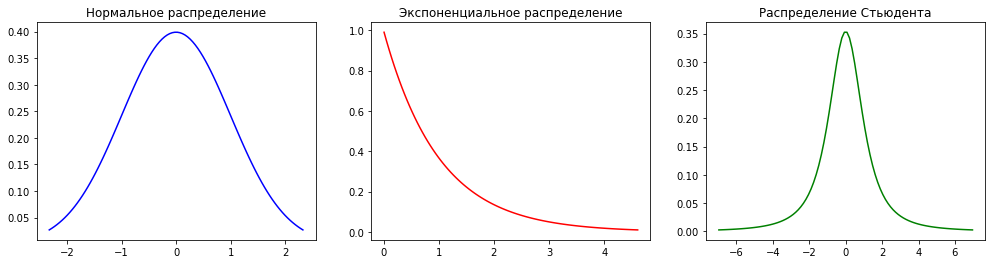

In [7]:
# Рассмотрим графики трех типов распределений

ticks = 100
scale = 1
loc = 0
df = 2

charts(ticks, scale, loc, df)

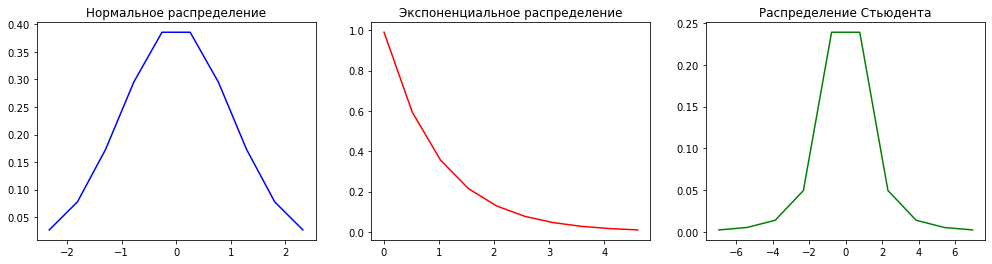

In [8]:
# Изменим гладкость функции уменьшив количество точек ticks

ticks = 10
scale = 1
loc = 0
df = 2

charts(ticks, scale, loc, df)

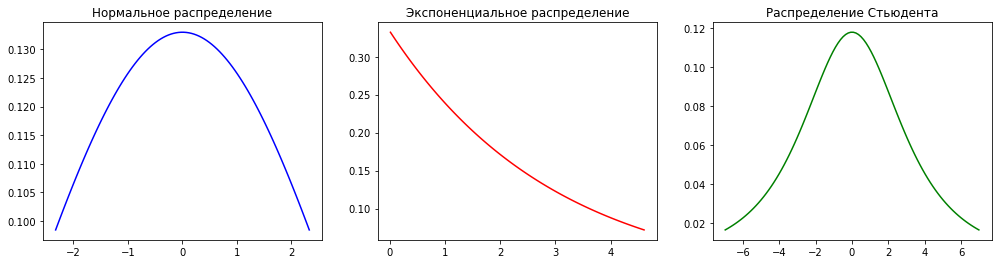

In [9]:
# Параметр scale отвечает за масштаб графика,
# степень его сужения кверху для графиков нормального распределения и распределения стьюдента,
# и степень его выпрямления для экспоненциального распределения

ticks = 100
scale = 3
loc = 0
df = 2

charts(ticks, scale, loc, df)

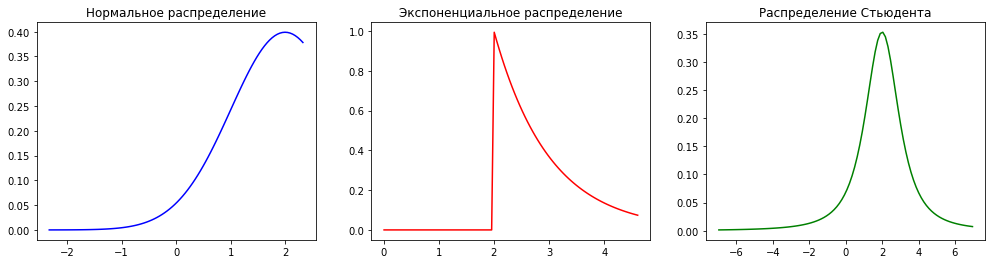

In [10]:
# Параметр loc отвечает за смещение графика вдоль горизонтальной оси

ticks = 100
scale = 1
loc = 2
df = 2

charts(ticks, scale, loc, df)

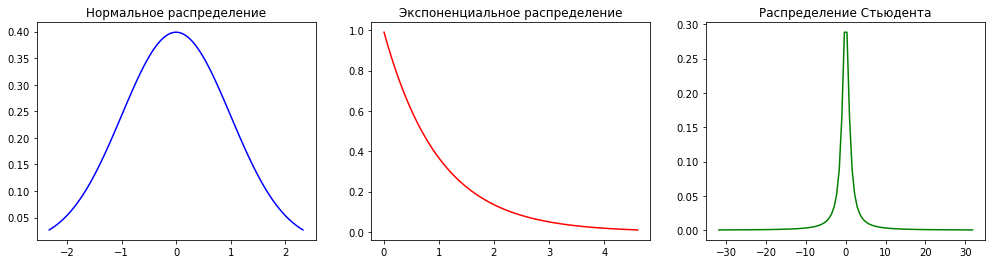

In [11]:
# Параметр df имеется только для распределения стьюдента. Он отвечает за плотность значений вокруг мат. ожидания

ticks = 100
scale = 1
loc = 0
df = 1

charts(ticks, scale, loc, df)